In [54]:
import cv2
import numpy as np
import pytesseract as ocr
import matplotlib.pyplot as plt

In [55]:
img = cv2.imread("img/bitmap.pbm",0)
img = img/255
img = 1-img

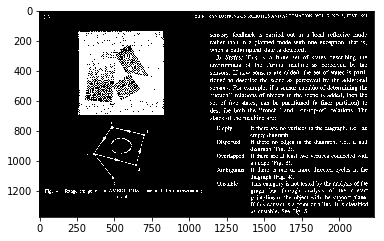

In [56]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [57]:
kernel1 = np.ones((1, 100), np.uint8)
kernel2 = np.ones((200, 1), np.uint8)
kernel3 = np.ones((1, 30), np.uint8)

In [58]:
dilate1 = cv2.dilate(img, kernel1)
erode1 = cv2.erode(dilate1, kernel1)

In [59]:
dilate2 = cv2.dilate(img, kernel2)
erode2 = cv2.erode(dilate2, kernel2)

In [60]:
intersection = cv2.bitwise_and(erode1, erode2)

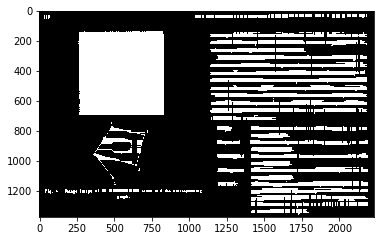

In [61]:
fig = plt.figure()
plt.imshow(intersection,cmap="gray")
plt.show()

In [62]:
closing = cv2.morphologyEx(intersection, cv2.MORPH_CLOSE, kernel3)

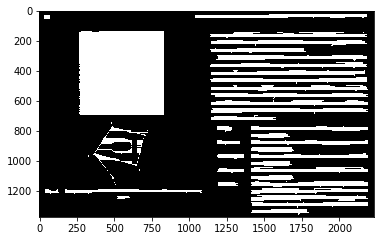

In [63]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [64]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing,connectivity=4)

In [65]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

54


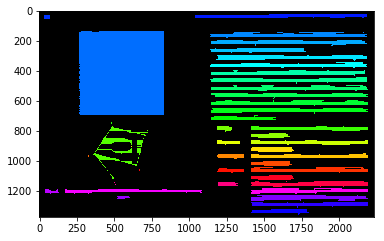

In [66]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [67]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [68]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

42


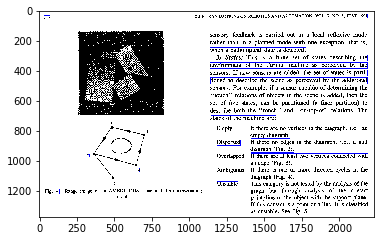

In [69]:
img3 = np.zeros((img.shape[0],img.shape[1],3),np.uint8)

img3[:,:,0] = img
img3[:,:,1] = img
img3[:,:,2] = img

area = np.array([None for i in range(len(boxes))])

comps = (1-img3)*255
c = 0
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    change_v = 0
    change_h = 0
    tmp = img[x:x+w,y:y+h]
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
            if(j < img.shape[0]):
                change_v += abs(img[j][k]-img[j+1][k])
            if(k < img.shape[1]):
                change_h += abs(img[j][k]-img[j][k+1])
    
    
    if(p/(h*w) > 0.15 and p/(h*w) < .7):
        if(p > 0 and (change_v+change_h)/p < .9):
            cv2.rectangle(comps,(y,x),(y+h,x+w),(0,0,255))
            c+=1
print(c)
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [71]:
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    tmp = img[x:x+w,y:y+h]
    phrase = ocr.image_to_string(tmp, lang='eng')
    cv2.imwrite("results/tmp/%d.png" % i,(1-tmp)*255)
    print(i,phrase)

0 as unstable. See Fig. 3:
1 DMO e ems OO me Meme COR es
2 
3 
4 point /line Of the Object with the support plane.
5 Ue 008
6 
7 
8 Range image of an AMBIGUOUS scene and the corresponding
9 Seraph but through analysis of the contact
10 
11 
12 
13 
14 
15 This Category is not tested by the analysis of the
16 diagrapn (Fig. 4).
17 
18 aWenley cane] eh:
19 lf there 1s One Or more directed cycles in the
20 an edge (Fig. 3).
21 
22 
23 
24 lf there are at least two Vertices connected with
25 diagraph (Fig. 2).
26 Dispersed
27 If there no edges in the diasraph, 1.¢., a null
28 
29 empty diagraph.
30 
31 
32 lf there are no vertices in the diagraph, i-e€., an
33 
34 states of the machine are:
35 describe both the touch and oOn-top-oi relations. [he
36 set Of five Ssiates, Can be partitioned (a finer partition) to
37 “touch relations of objects in the scene is added, then the
38 sensors. FOr example, if a sensor Capable Of determining the
39 fioned to describe the scene as perceived by the ad

In [36]:
kernel4 = np.ones((1, 40), np.uint8)
kernel5 = np.ones((60, 1), np.uint8)
kernel6 = np.ones((1, 10), np.uint8)
kernel7 = np.ones((8, 1), np.uint8)

In [37]:
dilate3 = cv2.dilate(img, kernel4)
erode3 = cv2.erode(dilate3, kernel4)

dilate4 = cv2.dilate(img, kernel5)
erode4 = cv2.erode(dilate4, kernel5)

intersection2 = cv2.bitwise_and(erode3, erode4)

closing2 = cv2.morphologyEx(intersection2, cv2.MORPH_CLOSE, kernel6)

closing2 = cv2.dilate(closing2, kernel7)

In [38]:
closing2 = closing2.astype(np.uint8)
ret, labels = cv2.connectedComponents(closing2,connectivity=4)
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img2 = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img2 = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img2[label_hue==0] = 0

for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

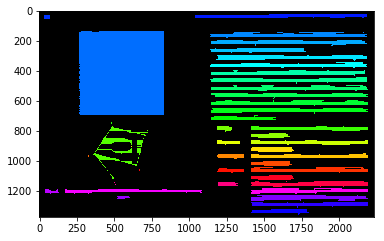

In [39]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

242


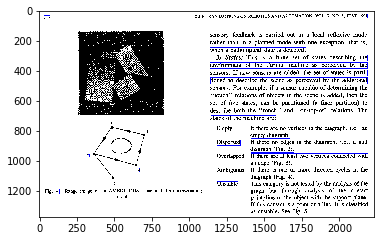

In [40]:
area = np.array([None for i in range(len(boxes))])

comps2 = (1-img3)*255
c = 0

pad = 3
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    change_v = 0
    change_h = 0
    tmp = img[x:x+w,y:y+h]
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
            if(j < img.shape[0]):
                change_v += abs(img[j][k]-img[j+1][k])
            if(k < img.shape[1]):
                change_h += abs(img[j][k]-img[j][k+1])
    
    
    if(p/(h*w) > 0.1 and p/(h*w) < .7):
        if(p > 0 and (change_v+change_h)/p < .9):
            cv2.rectangle(comps2,(y-pad,x-pad),(y+h+pad,x+w+pad),(0,0,255))
            c+=1
print(c)
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [41]:
cv2.imwrite("dilate1.pbm",1-dilate1)
cv2.imwrite("erode1.pbm",1-erode1)
cv2.imwrite("dilate2.pbm",1-dilate2)
cv2.imwrite("erode2.pbm",1-erode2)
cv2.imwrite("intersection.pbm",1-intersection)
cv2.imwrite("closing.pbm",1-closing)
cv2.imwrite("comps.png",comps)
cv2.imwrite("words.png",comps2)
cv2.imwrite("labeled.png",labeled_img)

True

In [42]:
cv2.imwrite("results/dilate1.png",(1-dilate1)*255)
cv2.imwrite("results/erode1.png",(1-erode1)*255)
cv2.imwrite("results/dilate2.png",(1-dilate2)*255)
cv2.imwrite("results/erode2.png",(1-erode2)*255)
cv2.imwrite("results/intersection.png",(1-intersection)*255)
cv2.imwrite("results/closing.png",(1-closing)*255)
cv2.imwrite("results/comps.png",comps)
cv2.imwrite("results/words.png",comps2)
cv2.imwrite("results/labeled.png",labeled_img)

True